In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/diabetes_two.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [14]:
df.isnull().sum()

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [17]:
most_frequent_catagory=df['Gender'].mode().iloc[0]
df['Gender'].fillna(most_frequent_catagory,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df['Gender']=le.fit_transform(df['Gender'])
df['Polyuria']=le.fit_transform(df['Polyuria'])
df['Polydipsia']=le.fit_transform(df['Polydipsia'])
df['sudden weight loss']=le.fit_transform(df['sudden weight loss'])
df['weakness']=le.fit_transform(df['weakness'])
df['Polyphagia']=le.fit_transform(df['Polyphagia'])
df['Genital thrush']=le.fit_transform(df['Genital thrush'])
df['visual blurring']=le.fit_transform(df['visual blurring'])
df['Itching']=le.fit_transform(df['Itching'])
df['Irritability']=le.fit_transform(df['Irritability'])
df['delayed healing']=le.fit_transform(df['delayed healing'])
df['partial paresis']=le.fit_transform(df['partial paresis'])
df['muscle stiffness']=le.fit_transform(df['muscle stiffness'])
df['Alopecia']=le.fit_transform(df['Alopecia'])
df['Obesity']=le.fit_transform(df['Obesity'])
df['class']=le.fit_transform(df['class'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    int64  
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    520 non-null    int64  
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

In [21]:
value_counts=df.groupby('class').size().reset_index(name='counts')
print(value_counts)

   class  counts
0      0     200
1      1     320


In [24]:
z_score=(df['Age']-df['Age'].mean())/df['Age'].std()

In [25]:
for i in z_score:
  if i<-3 :
    print("yount have outlier",i)
  elif i>3:
    print("you have outlier",i)
  else:
    continue


you have outlier 20.3456818436221


In [26]:
one_hot_encoded_data = pd.get_dummies(df,columns=['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity','class'])

In [27]:
one_hot_encoded_data


,Age,Gender_0,Gender_1,Polyuria_0,Polyuria_1,Polydipsia_0,Polydipsia_1,sudden weight loss_0,sudden weight loss_1,weakness_0,...,partial paresis_0,partial paresis_1,muscle stiffness_0,muscle stiffness_1,Alopecia_0,Alopecia_1,Obesity_0,Obesity_1,class_0,class_1
0,40.0,False,True,True,False,False,True,True,False,False,...,True,False,False,True,False,True,False,True,False,True
1,58.0,False,True,True,False,True,False,True,False,False,...,False,True,True,False,False,True,True,False,False,True
2,48.0,False,True,False,True,True,False,True,False,False,...,True,False,False,True,False,True,True,False,False,True
3,45.0,False,True,True,False,True,False,False,True,False,...,True,False,True,False,True,False,True,False,False,True
4,600.0,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,True,False,False,True,False,True,False,True,True,...,False,True,True,False,True,False,True,False,False,True
516,48.0,True,False,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
517,58.0,True,False,False,True,False,True,False,True,False,...,False,True,False,True,True,False,False,True,False,True
518,32.0,True,False,True,False,True,False,True,False,False,...,True,False,True,False,False,True,True,False,True,False


In [28]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   520 non-null    float64
 1   Gender_0              520 non-null    bool   
 2   Gender_1              520 non-null    bool   
 3   Polyuria_0            520 non-null    bool   
 4   Polyuria_1            520 non-null    bool   
 5   Polydipsia_0          520 non-null    bool   
 6   Polydipsia_1          520 non-null    bool   
 7   sudden weight loss_0  520 non-null    bool   
 8   sudden weight loss_1  520 non-null    bool   
 9   weakness_0            520 non-null    bool   
 10  weakness_1            520 non-null    bool   
 11  weakness_2            520 non-null    bool   
 12  Polyphagia_0          520 non-null    bool   
 13  Polyphagia_1          520 non-null    bool   
 14  Genital thrush_0      520 non-null    bool   
 15  Genital thrush_1      5

In [29]:
df['class'].unique()

array([1, 0])

In [30]:
df['class'].nunique()

2

In [31]:
pd.value_counts=df.groupby('class').size().reset_index(name='count')   #find unique value shortcut
print(pd.value_counts)

   class  count
0      0    200
1      1    320


In [32]:
from sklearn.utils import resample
import pandas as pd

# Assuming 'df' is already defined and contains the data

# Separate majority and minority classes
majority_class = df[df['class'] == 0]
minority_class = df[df['class'] == 1]

# Downsample majority class to 200 samples
majority_downsampled = resample(majority_class, replace=False, n_samples=200, random_state=42)

# Downsample minority class to 200 samples (or upsample if necessary)
minority_upsampled = resample(minority_class, replace=True, n_samples=200, random_state=42)

# Combine downsampled majority class and upsampled minority class
balanced_df = pd.concat([majority_downsampled, minority_upsampled])



In [33]:
# Count the number of instances in each class
value_counts = balanced_df['class'].value_counts().reset_index(name='count')
value_counts.columns = ['class', 'count']
print(value_counts)


   class  count
0      0    200
1      1    200


In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
x=df.drop('class',axis=1)
y=df['class']

smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)

oversampled_df=pd.DataFrame(x_resampled,columns=x.columns)
oversampled_df['class']=y_resampled


In [36]:
value_counts=oversampled_df.groupby('class').size().reset_index(name='count')
print(value_counts)

   class  count
0      0    320
1      1    320


In [39]:
value_counts=oversampled_df.groupby('class').size().reset_index(name='count')
print(value_counts)

   class  count
0      0    320
1      1    320


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

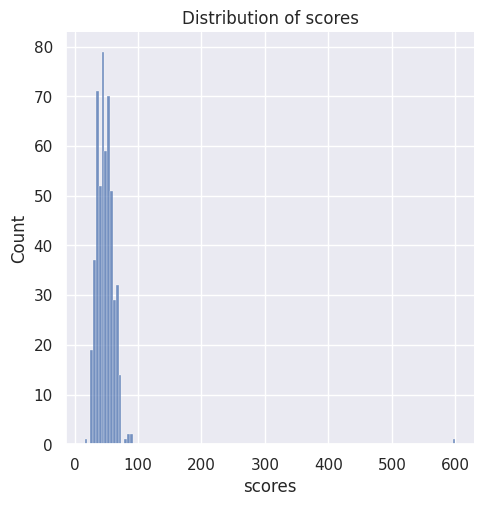

In [41]:
sns.set_theme(color_codes="red")
sns.displot(data=df['Age']).set(title="Distribution of scores",xlabel="scores")

In [42]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,49.080769,0.630769,0.496154,0.448077,0.417308,0.588462,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,27.077944,0.483061,0.500467,0.497776,0.493589,0.496482,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,600.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
z_score=(df['Age']-df['Age'].mean())/df['Age'].std()

In [44]:
z_score

0      -0.335357
1       0.329391
2      -0.039913
3      -0.150705
4      20.345682
         ...    
515    -0.372287
516    -0.039913
517     0.329391
518    -0.630800
519    -0.261496
Name: Age, Length: 520, dtype: float64

In [45]:
for i in z_score:
  if i<-3:
    print("yout have outlier",i)
  elif i>3:
    print("you have outlier ",i)
  else:
    continue

you have outlier  20.3456818436221


In [47]:
index= z_score.index[z_score==20.3456818436221][0]

In [48]:
index #find the index where the outlier is

4

In [49]:
df['Age'][4] #find the exact value of the index

600.0

In [50]:
df['Age'][4]=df['Age'].mean() #replace the outlier with mean

<ipython-input-50-799dc5a7d779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][4]=df['Age'].mean() #replace the outlier with mean


In [51]:
df['Age'][4] #check if the value is updated by the mean or not

49.08076923076923

In [52]:
duplicates = df[df.duplicated(keep='first')]   #find the duplicates
duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
159,38.0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
160,28.0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
161,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
162,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53.0,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
497,47.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
498,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
499,64.0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0


In [53]:
df_no_duplicates = df.drop_duplicates()   #find the duplicates

In [54]:
duplicates = df_no_duplicates[df_no_duplicates.duplicated(keep='first')]   #find the duplicates
duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


In [55]:
df_no_duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.000000,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.000000,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,48.000000,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.000000,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,49.080769,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.000000,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.000000,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.000000,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.000000,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


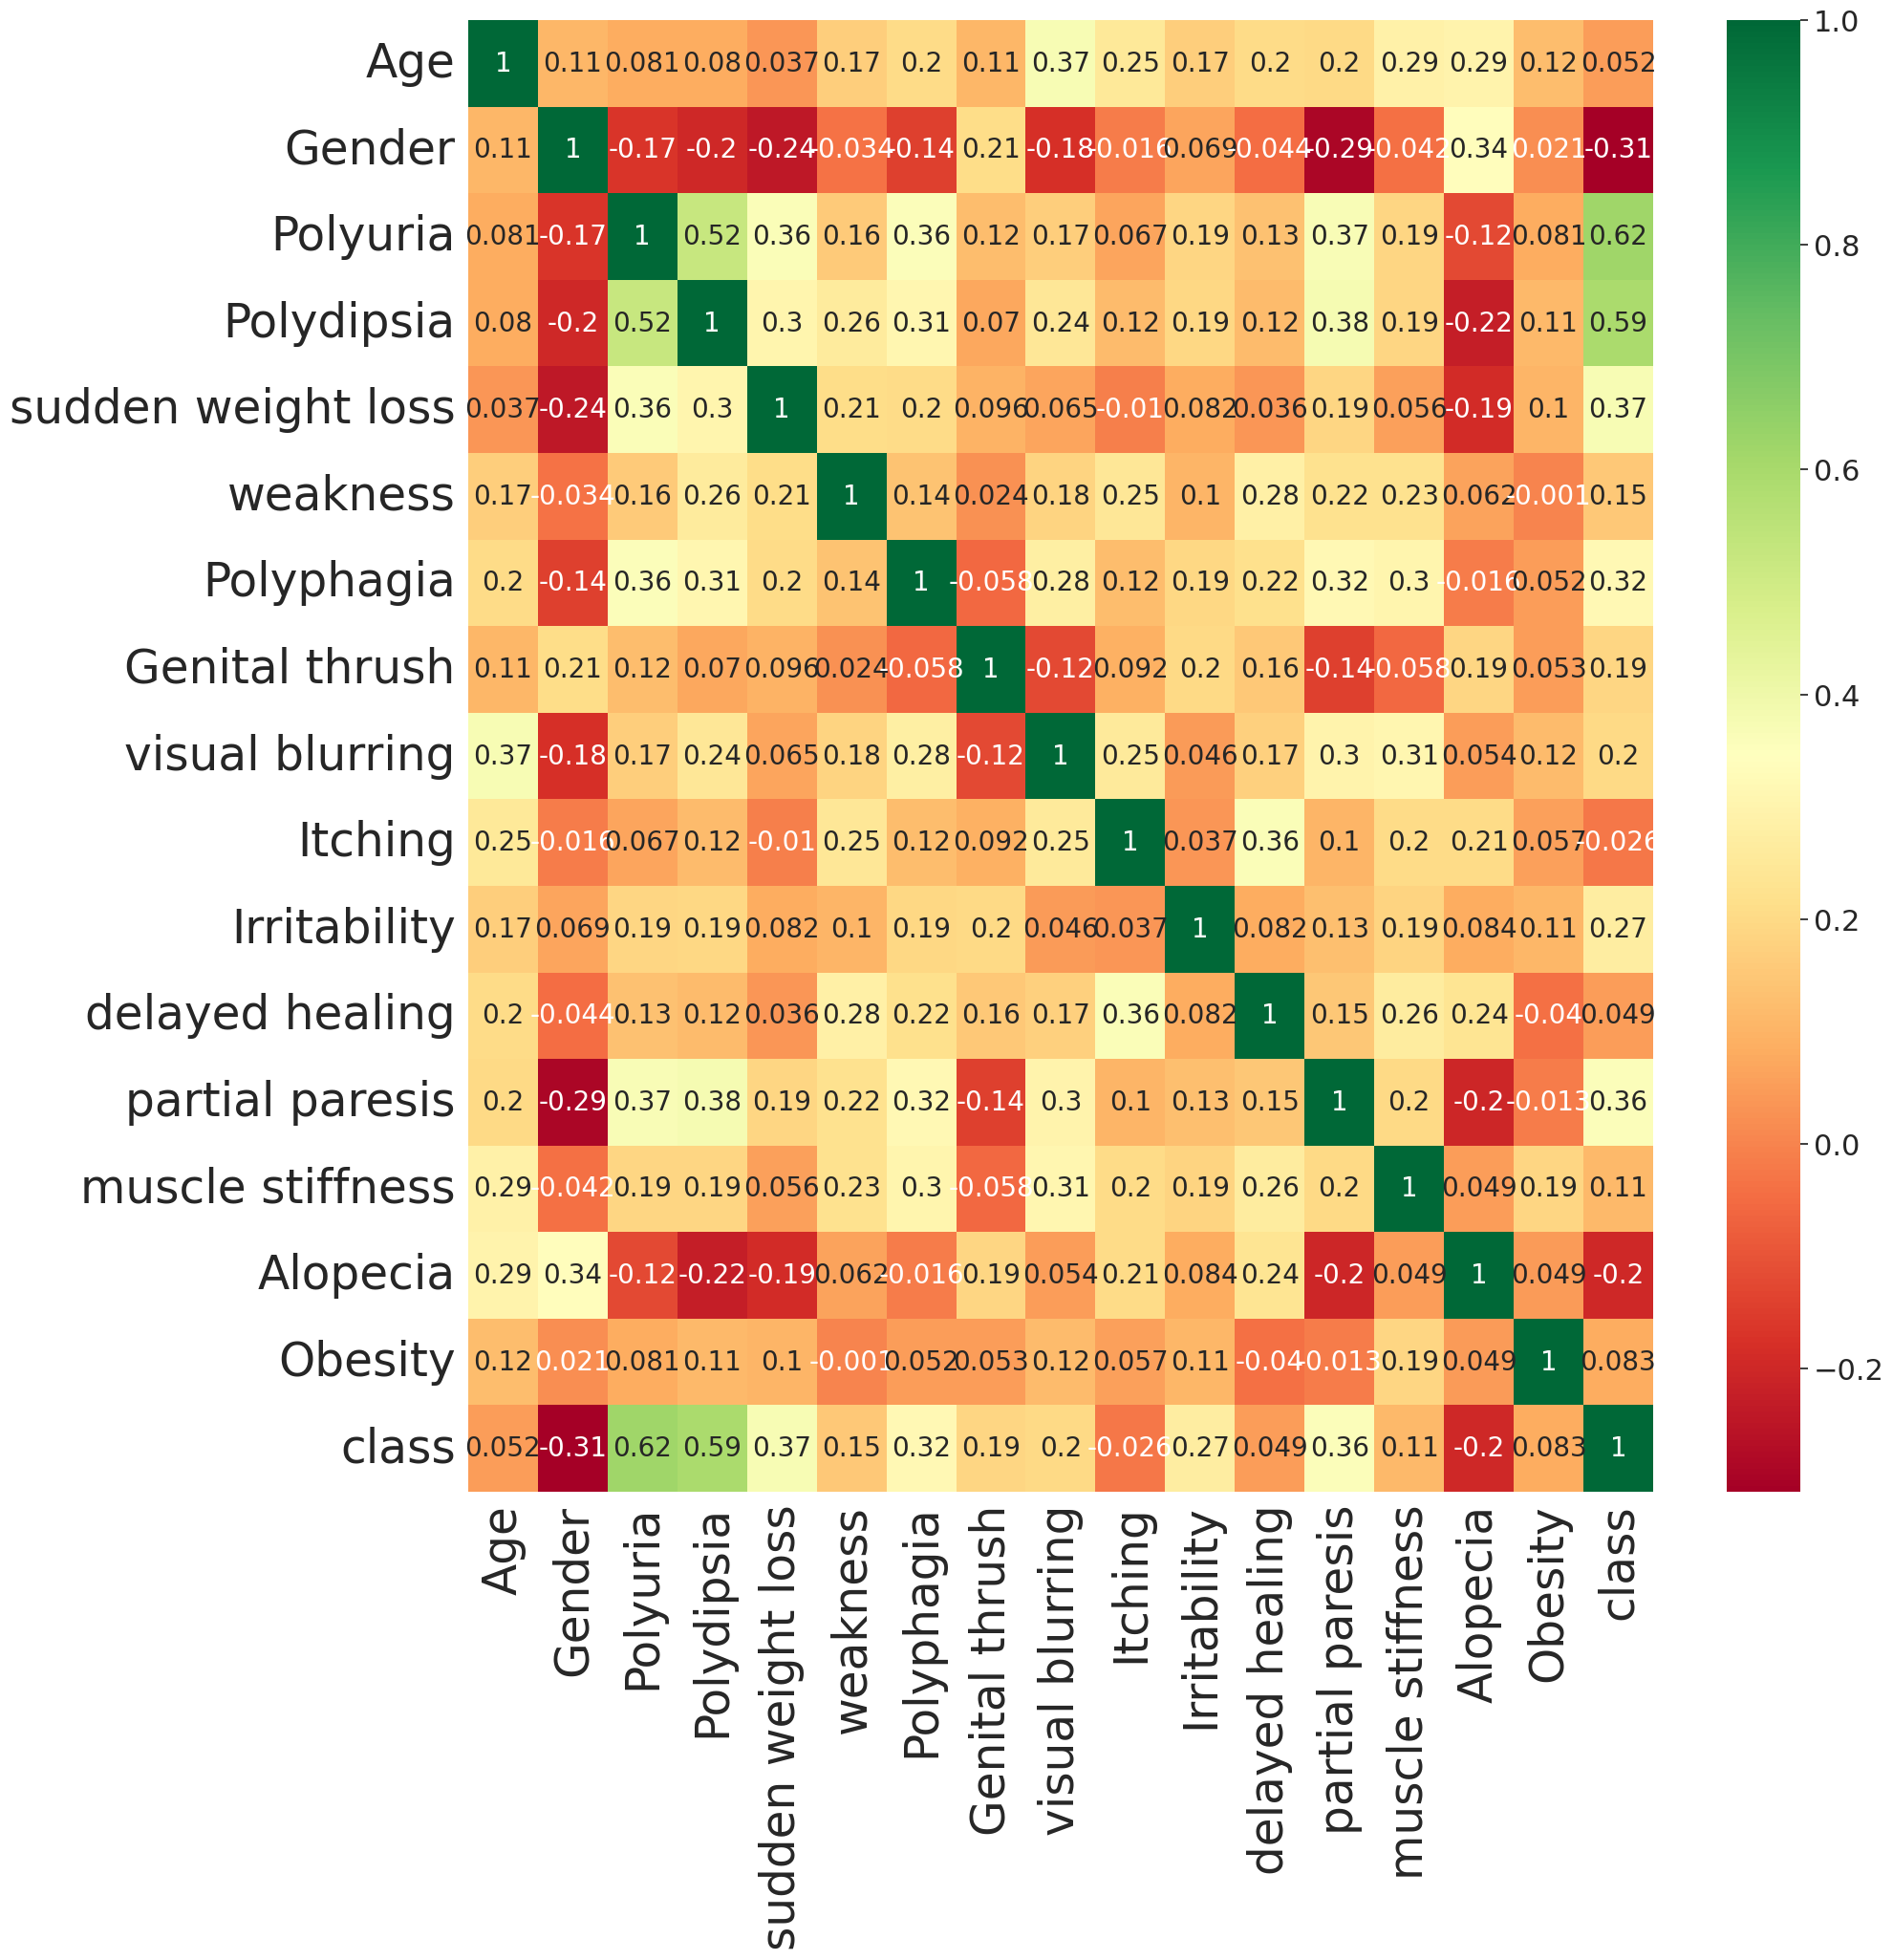

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set font scale for Seaborn
sns.set(font_scale=2)

# Create a figure with the specified size
plt.figure(figsize=(20, 20))

# Create the heatmap with Pearson correlation
heat_plot = sns.heatmap(df_no_duplicates.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size': 20})

# Set the font size for y-ticks and x-ticks
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

# Show the plot
plt.show()


In [57]:
correlations= df_no_duplicates.corr(method='pearson')
print(correlations['class'].sort_values(ascending=False).to_string())

class                 1.000000
Polyuria              0.620992
Polydipsia            0.594615
sudden weight loss    0.372554
partial paresis       0.360288
Polyphagia            0.316808
Irritability          0.268806
visual blurring       0.199228
Genital thrush        0.191117
weakness              0.153544
muscle stiffness      0.113890
Obesity               0.083167
Age                   0.051919
delayed healing       0.048976
Itching              -0.026411
Alopecia             -0.198024
Gender               -0.309413


In [58]:
df_no_duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.000000,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.000000,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,48.000000,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.000000,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,49.080769,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.000000,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.000000,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.000000,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.000000,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [59]:
from sklearn.utils import shuffle             #sometimes need to shuffle entire dataset to ensure diversity
shuffled_df = shuffle(df_no_duplicates)

In [60]:
shuffled_df #see shuffled data, look at the 'class' column

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
508,58.0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0
70,40.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
201,28.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
247,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
46,60.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,35.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
502,70.0,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0,0
45,48.0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1
77,55.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1


In [61]:
rearranged_df=shuffled_df.reset_index(drop=True) #re-arranging the index values

In [62]:
rearranged_df #see the index values

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,58.0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0
1,40.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,28.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
4,60.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,35.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
247,70.0,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0,0
248,48.0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1
249,55.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1


In [63]:
x=rearranged_df.drop(columns=['class'])   #x is all features, so remove target to get x

In [64]:
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,58.0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0
1,40.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,28.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0
4,60.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,35.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0
247,70.0,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0
248,48.0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0
249,55.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0


In [65]:
y=rearranged_df['class']         #y is target, it contains only the values of 'clas' column

In [66]:
y

0      0
1      1
2      0
3      0
4      1
      ..
246    1
247    0
248    1
249    1
250    1
Name: class, Length: 251, dtype: int64

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [68]:
scaler1=MinMaxScaler()
MinMax_scaled_df=scaler1.fit_transform(x)   #min_max scaling (0 to 1)
MinMax_scaled_df

array([[0.56756757, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.32432432, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16216216, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43243243, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.52702703, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44594595, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [69]:
scaler2=StandardScaler()
STD_scaled_df=scaler2.fit_transform(x)
STD_scaled_df

array([[ 0.73375726,  0.75415516, -1.05320639, ...,  1.24948969,
         1.33749351, -0.46104272],
       [-0.70953045, -1.32598709, -1.05320639, ..., -0.80032673,
        -0.74766718, -0.46104272],
       [-1.67172226,  0.75415516, -1.05320639, ..., -0.80032673,
        -0.74766718, -0.46104272],
       ...,
       [-0.06806925, -1.32598709, -1.05320639, ..., -0.80032673,
        -0.74766718, -0.46104272],
       [ 0.49320931, -1.32598709,  0.94948152, ..., -0.80032673,
        -0.74766718, -0.46104272],
       [ 0.0121134 ,  0.75415516,  0.94948152, ..., -0.80032673,
        -0.74766718, -0.46104272]])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)  #split randomly 20% data for testing and 80% for training
                                                                    #x_train means the features of training data
                                                                    #y_train meand the target of training data

In [72]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 243 to 221
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    float64
 1   Gender              200 non-null    int64  
 2   Polyuria            200 non-null    int64  
 3   Polydipsia          200 non-null    int64  
 4   sudden weight loss  200 non-null    int64  
 5   weakness            200 non-null    int64  
 6   Polyphagia          200 non-null    int64  
 7   Genital thrush      200 non-null    int64  
 8   visual blurring     200 non-null    int64  
 9   Itching             200 non-null    int64  
 10  Irritability        200 non-null    int64  
 11  delayed healing     200 non-null    int64  
 12  partial paresis     200 non-null    int64  
 13  muscle stiffness    200 non-null    int64  
 14  Alopecia            200 non-null    int64  
 15  Obesity             200 non-null    int64  
dtypes: float64(

In [73]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 200 entries, 243 to 221
Series name: class
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


In [74]:
print("train data size(features): ",len(x_train))
print("train data size(target): ",len(y_train))

print("test data size(features): ",len(x_test))
print("test data size(target): ",len(y_test))

train data size(features):  200
train data size(target):  200
test data size(features):  51
test data size(target):  51


<font color="yellow"> K fold **validation**

In [75]:
from sklearn.svm import SVC

SVC_model= SVC(C=0.5, kernel='poly', degree=2, gamma='scale', coef0=0.0, tol=0.0001, decision_function_shape= 'ovr')


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold= KFold(10)

accuracy= cross_val_score(SVC_model, x_train, y_train, cv= k_fold, scoring='accuracy')
precision= cross_val_score(SVC_model, x_train, y_train, cv= k_fold, scoring='precision')
recall= cross_val_score(SVC_model, x_train, y_train, cv= k_fold, scoring='recall')
f1_score= cross_val_score(SVC_model, x_train, y_train, cv= k_fold, scoring='f1')
AUC= cross_val_score(SVC_model, x_train, y_train, cv= k_fold, scoring='roc_auc')


In [77]:
accuracy


array([0.7 , 0.85, 0.55, 0.75, 0.7 , 0.7 , 0.75, 0.65, 0.7 , 0.6 ])

In [78]:
overall_accuracy= sum(accuracy) / len(accuracy)
print(overall_accuracy)


0.6950000000000001


In [79]:
precision


array([0.7 , 0.85, 0.55, 0.75, 0.7 , 0.7 , 0.75, 0.65, 0.7 , 0.6 ])

In [80]:
overall_precision= sum(precision) / len(precision)
print(overall_precision)


0.6950000000000001


In [81]:
precision

array([0.7 , 0.85, 0.55, 0.75, 0.7 , 0.7 , 0.75, 0.65, 0.7 , 0.6 ])

In [82]:
overall_precision = sum(precision) / len(precision)
print(overall_precision)


0.6950000000000001


In [83]:
recall


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [84]:
overall_recall = sum(recall) / len(recall)
print(overall_recall)


1.0


In [85]:
f1_score


array([0.82352941, 0.91891892, 0.70967742, 0.85714286, 0.82352941,
       0.82352941, 0.85714286, 0.78787879, 0.82352941, 0.75      ])

In [86]:
overall_f1_score = sum(f1_score) / len(f1_score)
print(overall_f1_score)


0.8174878487497083


In [87]:
AUC


array([1.        , 0.8627451 , 0.87878788, 0.89333333, 1.        ,
       0.86904762, 0.98666667, 0.72527473, 0.73809524, 0.9375    ])

In [88]:
overall_AUC = sum(AUC) / len(AUC)
print(overall_AUC)


0.8891450559244676


Test Performance data

In [89]:
SVC_model= SVC(C=0.5, kernel='poly', degree=2, gamma='scale', coef0=0.0, tol=0.001, decision_function_shape= 'ovr')


In [90]:
SVC_model.fit(x_train, y_train)


SVC(C=0.5, degree=2, kernel='poly')

In [93]:
unseen_prediction= SVC_model.predict(x_test)


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("accuracy: ", accuracy_score(unseen_prediction, y_test))
print("precision: ", precision_score(unseen_prediction, y_test))
print("recall: ", recall_score(unseen_prediction, y_test))
print("f1_score: ", f1_score(unseen_prediction, y_test))
print("AUC: ", roc_auc_score(unseen_prediction, y_test))

accuracy:  0.6666666666666666
precision:  1.0
recall:  0.6666666666666666
f1_score:  0.8


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.